In [2]:
import pandas as pd
import plotly.express as px

# read in the data
df = pd.read_csv("data/2018_ipl_ball_by_ball.csv")

# group the data by batter and matchid
grouped = df.groupby(["batter", "ID"])


In [3]:
# calculate the batting strike rate for each match
strike_rates = []
for name, group in grouped:
    runs = group["batsman_run"].sum()
    balls = group.shape[0]
    strike_rate = (runs / balls) * 100
    strike_rates.append((name[0], name[1], strike_rate))

In [4]:
# create a DataFrame with the strike rate data
df_strike_rates = pd.DataFrame(strike_rates, columns=["batter", "matchid", "strike_rate"])

# create an animated scatter plot
fig = px.scatter(df_strike_rates, x="matchid", y="strike_rate", animation_frame="matchid", 
                 animation_group="batter", color="batter", range_y=[0, 250])
fig.update_layout(title="Batting Strike Rates over Time", xaxis_title="Match ID", yaxis_title="Batting Strike Rate")

# show the plot
fig.show()

C:\Users\manna\AppData\Local\Temp\ipykernel_1048\3318923837.py:5: DtypeWarning:

Columns (20,30) have mixed types. Specify dtype option on import or set low_memory=False.



         ID  runs  balls_faced  strike_rate  match_num
0   1136563    31           33    93.939394          1
1   1136568    21           16   131.250000          2
2   1136571    57           31   183.870968          3
3   1136574    92           62   148.387097          4
4   1136579    30           26   115.384615          5
5   1136584    18           15   120.000000          6
6   1136589    68           44   154.545455          7
7   1136591    32           26   123.076923          8
8   1136595     8           11    72.727273          9
9   1136599    39           30   130.000000         10
10  1136605    70           42   166.666667         11
11  1136608    48           29   165.517241         12
12  1136611    12           11   109.090909         13
13  1136613     4            9    44.444444         14
14  1175356     6           12    50.000000         15
15  1175362    46           33   139.393939         16
16  1175366     3           10    30.000000         17
17  117536

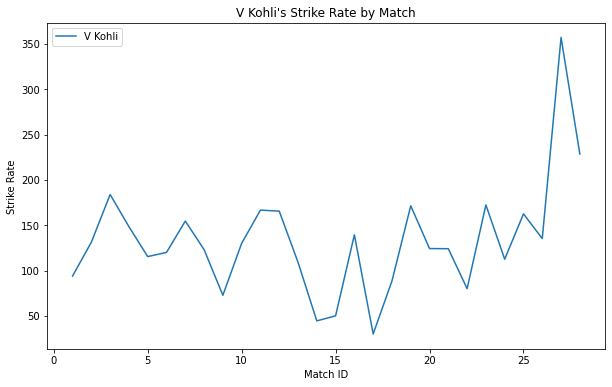

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# read in the data
data = pd.read_csv("data/2018_and_2019_ipl_ball_by_ball.csv")

# select a specific batsman
selected_batsman = "V Kohli"

# filter the data to only include the selected batsman
selected_batsman_data = data[data['batter'] == selected_batsman]

# group the data by match id and calculate the total runs and balls faced for the selected batsman in each match
match_batsman_data = selected_batsman_data.groupby('ID')['batsman_run'].agg(['sum', 'count']).reset_index()
match_batsman_data.columns = ['ID', 'runs', 'balls_faced']

# calculate the strike rate for the selected batsman in each match
match_batsman_data['strike_rate'] = (match_batsman_data['runs'] / match_batsman_data['balls_faced']) * 100

# create a dictionary that maps the actual match id to sequential numbers
match_id_map = {match_id: i+1 for i, match_id in enumerate(match_batsman_data['ID'].unique())}

# create a new column in the match_batsman_data dataframe that maps the actual match id to sequential numbers
match_batsman_data['match_num'] = match_batsman_data['ID'].map(match_id_map)

print(match_batsman_data)
# plot a line chart to show how the selected batsman's strike rate changed for each match
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(match_batsman_data['match_num'], match_batsman_data['strike_rate'], label=selected_batsman)

ax.set_xlabel('Match ID')
ax.set_ylabel('Strike Rate')
ax.set_title(f"{selected_batsman}'s Strike Rate by Match")
ax.legend()
plt.show()


In [15]:
import pandas as pd
import plotly.graph_objs as go

# create a trace for the animated line plot
trace = go.Scatter(x=match_batsman_data['match_num'], y=match_batsman_data['strike_rate'], mode='lines')

# create the layout for the animated line plot
layout = go.Layout(xaxis=dict(title='Match Number'), yaxis=dict(title='Strike Rate'), title=f'{selected_batsman} Strike Rate by Match')

# create the figure for the animated line plot
fig = go.Figure(data=[trace], layout=layout)

# add the animation to the figure
fig.update_layout(updatemenus=[dict(type='buttons', showactive=False, buttons=[dict(label='Play', method='animate', args=[None, dict(frame=dict(duration=550, redraw=True), fromcurrent=True, mode='immediate')])])])

# create the frames for the animation
frames = []
for i in range(1, int(match_batsman_data['match_num'].max())):
    frame_data = match_batsman_data[match_batsman_data['match_num'] <= i]
    frame_trace = go.Scatter(x=frame_data['match_num'], y=frame_data['strike_rate'], mode='lines')
    frame = go.Frame(data=[frame_trace])
    frames.append(frame)

# add the frames to the figure
fig.frames = frames

# show the animated line plot
fig.show()
#This will create an animated line plot showing how the selected batsman's strike rate changes over time/matches. The plot will automatically play through each match, showing the batsman's strike rate for each match in turn.
